In [ ]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
Review_df = pd.read_csv('/content/Review_df.csv')
Review_df.head(5)

,ID,Title,Author,Rating,Content,Timestamp,Profile ID,Is Verified,Helpful Count,Product Attributes
0,R3MQEYLQ6HSUN,"5.0 out of 5 stars Simple to use , good sound ...",MicheleA,5,Honestly ? Much better than expected. Sound is...,"Reviewed in Canada August 4, 2024",AE4QMMKNWWM3JHJJTFNEGMKH7WVQ,True,2,Colour Name: Black
1,R3JND8CNZWPG7L,5.0 out of 5 stars My honest review,Rachael,5,I’ve had these headphone for over a year so I’...,"Reviewed in Canada March 23, 2024",AF53A7IJCRV66CSGU53OTYXN4KYA,True,49,Colour Name: White
2,R31P17PCMMIHVF,4.0 out of 5 stars Works well,Amazon Customer,4,"These earbuds are good, first off, pairing the...","Reviewed in Canada August 3, 2024",AFCYGM7KMHYMTJZCXL2FCNKFQU7Q,True,0,Colour Name: Black
3,R2BMZ6TVOH23TE,5.0 out of 5 stars Love it,Dzodox,5,I bought these for my girlfriend and she likes...,"Reviewed in Canada July 26, 2024",AFK66RWLAKY2WFRZNYGFOGMOHISQ,True,1,NaN
4,R1XMK3C5SUNQJ0,5.0 out of 5 stars nice one,Arda Gunel,5,It is my first wireless headphone. Yet I canno...,"Reviewed in Canada December 14, 2022",AHET3B3JPFIH2LHC7Q77Z2UNOV7Q,True,28,Colour Name: Black


In [ ]:
Review_df.isnull().sum()

,0
ID,0
Title,0
Author,0
Rating,0
Content,0
Timestamp,0
Profile ID,0
Is Verified,0
Helpful Count,0
Product Attributes,2


In [ ]:
Review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  421 non-null    object
 1   Title               421 non-null    object
 2   Author              421 non-null    object
 3   Rating              421 non-null    int64 
 4   Content             421 non-null    object
 5   Timestamp           421 non-null    object
 6   Profile ID          421 non-null    object
 7   Is Verified         421 non-null    bool  
 8   Helpful Count       421 non-null    int64 
 9   Product Attributes  419 non-null    object
dtypes: bool(1), int64(2), object(7)
memory usage: 30.1+ KB


In [ ]:
Review_df['Product Attributes'].describe()

,Product Attributes
count,419
unique,24
top,Colour Name: Black
freq,71


In [ ]:
#Handling the missing data by filling the most frequent values on NaN cells
Handle_missing_data=Review_df.fillna('Colour Name: Black', axis=1)

<Figure size 500x400 with 0 Axes>

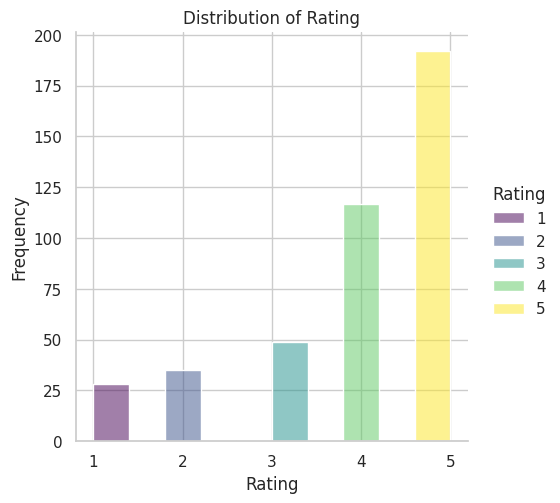

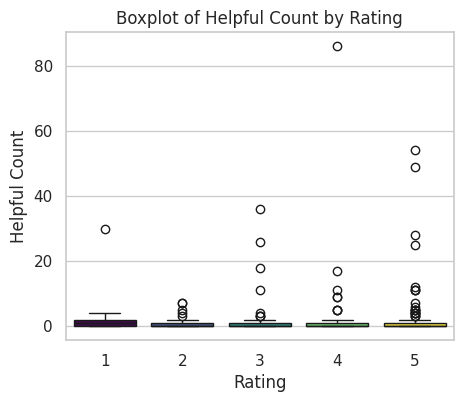

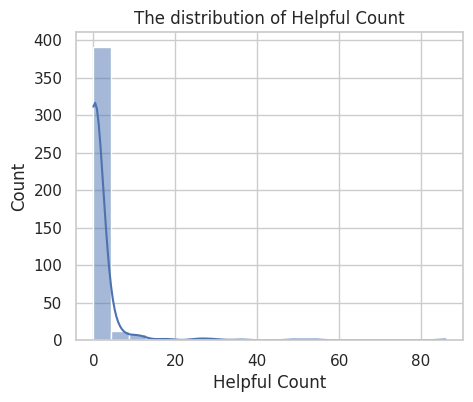

In [ ]:
# Visulaize the distribution of rating
sns.set(style="whitegrid")
plt.figure(figsize=(5,4))
sns.displot(x='Rating', data=Review_df, hue='Rating',palette='viridis' )
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()
# Visualize Boxplot of Helpful Count by Rating
plt.figure(figsize=(5,4))
sns.boxplot(x='Rating',y= 'Helpful Count', data=Review_df, hue='Rating', palette='viridis', legend=False )
plt.title('Boxplot of Helpful Count by Rating')
plt.xlabel('Rating')
plt.ylabel('Helpful Count')
plt.show()
# Visuaize the distribution of Helpful Count
plt.figure(figsize=(5,4))
sns.histplot(x='Helpful Count', data=Review_df, bins=20,kde= 'bar')
plt.title('The distribution of Helpful Count')
plt.xlabel('Helpful Count')
plt.show()


**Data Visualization Insights

Rating Distribution:

-The majority of the ratings are concentrated on the higher end (4 and 5 stars), indicating a generally positive sentiment in the reviews.
Helpful Count Distribution:

-Most reviews have a low "Helpful Count," with a significant number of reviews having zero helpful votes. A few outliers have much higher counts, up to 86.
Helpful Count by Rating:

-Reviews with higher ratings (4 and 5 stars) tend to have slightly higher "Helpful Count" values, though there's significant variability across ratings.**bold text**






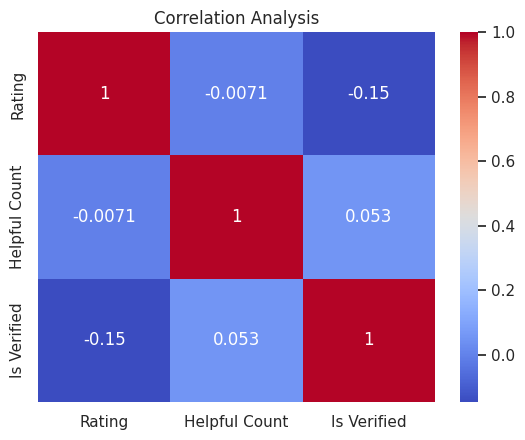

In [ ]:
# Correlation Analysis between numeric variables
correlation_matrix = Review_df[['Rating', 'Helpful Count','Is Verified']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis')
plt.show()


The correlation between Rating and Helpful Count is very weak, Rating and Is verified too (close to zero), suggesting that a higher rating does not strongly predict whether a review will receive more helpful votes.

# **Sentiment Analysis using TextBlob**

**Sentiment Polarity:**

Sentiment polarity values range from -1 (most negative) to 1 (most positive), with 0 being neutral.
**Key Interpretations:**
Positive Sentiment (Polarity > 0):

-Reviews with a positive sentiment will have a polarity score greater than 0, indicating the user is expressing favorable opinions about the product.

Neutral Sentiment (Polarity = 0):

-A score close to 0 indicates a neutral sentiment, meaning the review doesn't contain strong positive or negative emotions.

Negative Sentiment (Polarity < 0):

-Negative polarity values indicate dissatisfaction or negative feelings towards the product.

In [ ]:
# Create a new column with sentiment index
Review_df['Sentiment Polarity']= Review_df['Content'].apply(lambda x: TextBlob(x).sentiment.polarity)
Review_df[['Sentiment Polarity','Content']].head(10)

,Sentiment Polarity,Content
0,0.136111,Honestly ? Much better than expected. Sound is...
1,0.167079,I’ve had these headphone for over a year so I’...
2,0.142187,"These earbuds are good, first off, pairing the..."
3,0.373333,I bought these for my girlfriend and she likes...
4,0.131667,It is my first wireless headphone. Yet I canno...
5,0.062133,"As far as the sound quality goes, the earbuds ..."
6,0.063855,I think my AirPods Pros broke randomly which p...
7,0.262656,These beauts studio are great little earbuds! ...
8,0.151389,I have never really liked the way buds feel in...
9,0.000000,Les écouteurs ont une excellente qualité de so...


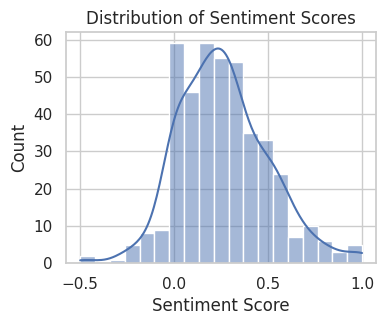

In [ ]:
# Visualize sentiment distribution
plt.figure(figsize=(4, 3))
sns.histplot(Review_df['Sentiment Polarity'], kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.show()

In [ ]:
print(Review_df['Sentiment Polarity'].describe())

count    421.000000
mean       0.262423
std        0.240180
min       -0.500000
25%        0.100000
50%        0.244757
75%        0.400000
max        1.000000
Name: Sentiment Polarity, dtype: float64


# **Summary:**

Overall, the reviews tend to lean positive, with an average sentiment polarity of 0.26.

A significant portion of the reviews has neutral to mildly positive sentiment (as indicated by the 25th and 50th percentiles).

There are a few strongly positive reviews (with polarity near 1.0) and a few negative ones (with a minimum of -0.5), but the sentiment is generally mild rather than extreme.

This suggests that while most customers have a favorable view of the product, it isn't universally praised, and there are some mixed opinions.